# 2nd lecture on python and sympy

In this lecture we'll continue exploring the functionalities of python and sympy. 
Here's the list of the topics you'll find in this notebook:

* control flow in python
* function calling inside loops
* 2D and 3D plotting with sympy
  * plots of functions
  * parametric plots
  * implicit plots
  * the hyperboloid as a ruled surface

## References

Here are reported useful websites where you can find documentation and help for your python projects:

### Official documentation
* [official python website](https://www.python.org/)
* [sympy official website](https://www.sympy.org/en/index.html)

### Forums
* [stack exchange](https://codereview.stackexchange.com/?tags=python)
* [stack overflow](https://stackoverflow.com/questions/tagged/python)

### Animations
* [2D animations](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/)
* [3D animations](https://pythonmatplotlibtips.blogspot.com/2018/11/animation-3d-surface-plot-funcanimation-matplotlib.html)

### Sympy VS Mathematica
[Comparison between Sympy and Mathematica](https://github.com/sympy/sympy/wiki/SymPy-vs.-Mathematica)

## Control flow

One of the main advantages of programming is the ability to repeat some task automatically.
This can save you a lot of time, and automate your processes avoiding manual, boring and error-prone repetitions.

There are 3 tools you need to learn:

* **if-else** statements
* **for** loops
* **while** loops

### if-else

It may happen that you want some code to be executed only if some condition is satisfied, and some other code to be executed elsewise.
This mechanism is inspired on how humans think. For instance, let's consider the study of the stationary points of a function 
$$f : \mathbb{R} \to \mathbb{R}$$

The steps you learned are more or less the following:
* Evaluate the 1st derivative $f'(x)$
* Find the values $x_i$ for which it vanishes
* Study the $f''(x)$ at those points
* For each or those points check the following conditions:
  * **if** $f''(x_i) > 0$ it corresponds to a minimum
  * **else if** $f''(x_i) < 0$ it corresponds to a maximum
  * **else** $f''(x_i) = 0$, and you need to study $f^{(n)}(x_i) \quad n>2$ until the latter doesn't vanish at that point
  * When you find $n$ such that $f^{(n)}(x_i) \neq 0$
    - **if** $n$ is even, the point is a maximum or minimum
    - **else**, it is an inflection point
    
We've used if-else statements all over the previous list of instructions (and also some hidden for and while). Let's now see them in action with python.  
 
 


In [1]:
print("Boolean values can control the conditional execution of some piece of code:")
if 3>0: # check if 3>0
  print("3 is greater than 0") # ok, code is executed
else:
  print("3 is less than 0") # this is ignored: 3<=0 is False

Boolean values can control the conditional execution of some piece of code:
3 is greater than 0


In [2]:
a = 5
b = -6
if a>0 and b>0: # if both are positive
    print(a,"and", b, "are both positive")
elif a>0 and b<0: # a positive, b negative
    print(a, "is positive,", b, "is negative")
elif a<0 and b>0: # a negative, b positive
    print(b, "is positive,", a, "is negative")
elif a==0 or b==0: # both zero
    print(a, "or", b, "is 0")
else: # if none of the above conditions were satisfied
    print(a, "and", b, "are both negative")

5 is positive, -6 is negative


In [3]:
print("Now let's try with something non-trivial")
from datetime import date # module for date and time
today = date.today() # today's date
print("Today's date:", today) # printing out the date

Now let's try with something non-trivial
Today's date: 2021-01-11


In [4]:
print("Note:", type(today), "is not a string")
AMD = str(today).split("-") # converting to string and splitting
D =  int(AMD[2]) # converting to int
if D%2==0: # D is even
    print("Today is an even day")
else: # D is odd
    print("Today is an odd day")


Note: <class 'datetime.date'> is not a string
Today is an odd day


In [5]:
print("Now let's check greek pi")
from numpy import pi as pi
if type(pi)==int: # pi is memorized as an integer? (answer: no --> False)
    print(pi,"is an integer")
else: # pi is a decimal number in memory --> True
    print(pi, "is not an integer")

Now let's check greek pi
3.141592653589793 is not an integer


### for and while loops

For and while loops allow the repetitive execution of some piece of code:

* **for**   : run the code for a predefined list of values (e.g. all the names in a list)
* **while** : run the code until a condition is not valid anymore

In [6]:
print("'for' loop")
for f in ["Al","John","Jack"]: # print names in a list
    print("Good morning", f, ", how are you?")

'for' loop
Good morning Al , how are you?
Good morning John , how are you?
Good morning Jack , how are you?


In [7]:
print("It's useful to call functions inside loops")
def introduce(name): # introduce yourself saying your name
    print("Hi, my name is", name)
      

for f in ["Al","John","Jack"]:
    introduce(f) # 'f' introduces itself

It's useful to call functions inside loops
Hi, my name is Al
Hi, my name is John
Hi, my name is Jack


In [8]:
print("'while' loop")
T=0 # stating time of your clock
print("You can start your test") # ok, the test begins
while T<7: # time is less that 7 (minutes for instance)
    print(7-T, "minutes left") # prints how much time is left
    T = T + 1 # increment T: where T is stored, put the previous value of T incremented by 1
# end of while
print("Time is up!") # end of the test

'while' loop
You can start your test
7 minutes left
6 minutes left
5 minutes left
4 minutes left
3 minutes left
2 minutes left
1 minutes left
Time is up!


## Plotting with sympy

In the previous lecture we started to see how sympy can generate plots.
Here we'll continue, exploring it's functionalities with 2D and 3D plots.

In [9]:
import sympy
from sympy import * # importing the whole sympy
from sympy.plotting import * # importing the plotting utilities
x, y, z = symbols("x, y, z") # symbols for the coordinates
t, s = symbols("t, s") # symbols for the parameters (parametric curves and surfaces) 

### Plot of explicit functions

sympy.plotting.plot and sympy.plotting.plot3d accept explicit expressions and a range of values for the independent variable(s)

#### 2D plots

We now plot the function:

$$f(x) = x + 5\sin{\left(x - \frac{\pi}{2}\right)}$$

In [10]:
print("We define a function")
def fun(x):
    return x + 5*sin(x - pi/2)

We define a function


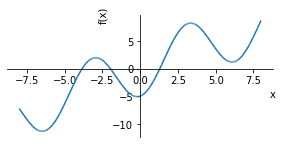

In [11]:
# %matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 4, 2
plot(fun(x), (x,-8,8))


#### Animations
We can build animations for an improved visualization. Let's now consider the above function. we can animate it such that it seems to be drawn by hand:

In [12]:
# %matplotlib inline
import numpy as np # numpy (arrays of numbers)
import matplotlib
import matplotlib.pyplot as plt # plotting with matplotlib

from matplotlib import animation, rc  # animations with matplotlib
from IPython.display import HTML # HTML and javascript support

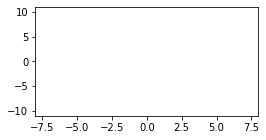

In [13]:
fig, ax = plt.subplots() # assigninf the figure and axes to 2 variables

ax.set_xlim((-8, 8)) # limits on the x-axis
ax.set_ylim((-11, 11)) # limits on the y-axis

# initializing the variable line with an empty plot:
# it will be updated in the following lines of code
line = ax.plot([], [], linewidth=2)[0];

In [14]:
print("Here we define the initialization function:")
def init():
    line.set_data([], [])
    return (line,)

Here we define the initialization function:


In [15]:
print("Here we define the animation function, which depend on the evolution parameter 'i'")
def animate(i):
    x0 = -8
    m = i/100
    x = np.linspace(x0, x0 + i/10, 100)
    y = x + 5*np.sin(x - np.pi/2)
    line.set_data(x, y)
    return (line,)

Here we define the animation function, which depend on the evolution parameter 'i'


In [16]:
frn = 180 # i=0,...,179 
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frn, interval=20, 
                               blit=True)

In [17]:
jsanim = HTML(anim.to_jshtml())
display(jsanim)

#### 3D plots

We can do 3D plots as well. Below we plot
$$f(x,y) = y \sin{(x)}$$

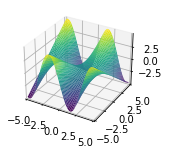

In [18]:
# %matplotlib notebook
x,y = symbols("x, y")
plot3d(y*sin(x), (x,-5,5),(y,-5,5))

Let's see an animation for 3d plots:

In [19]:
print("Again, we can animate our plot:")
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib

Again, we can animate our plot:


In [20]:
N = 150 # size of our lattice of points in the xy-plane
fps = 10 # frames per second
frn = 50 # number of frames from the animation

x = np.linspace(-4,4,N) # N points between -4 and 4
x, y = np.meshgrid(x, x) # lattice of points in [-4,4]x[-4,4]
zarray = np.zeros((N, N, frn)) # NxNxfrn numbers

# f = lambda x,y,sig : 1/np.sqrt(sig)*np.exp(-(x**2+y**2)/sig**2) # our function
f = lambda x,y,sig : sig*np.exp(-(x**2+y**2)) # our function

for i in range(frn): # generating 'frn' plots (one for each frame)
    sig_i = 1.5 + np.sin(i*2*np.pi/frn) # sigma oscillating in time (with 'i')
    sig_i = np.sin(i*2*np.pi/frn) # sigma oscillating in time (with 'i')
    zarray[:,:,i] = f(x,y,sig_i) # global extra oscillation with time

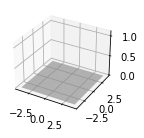

In [21]:
def update_plot(frame_number, zarray, plot):
    plot[0].remove() # removing the old plot
    # the plot is now set equal to the 'frame_number' one
    plot[0] = ax.plot_surface(x, y, zarray[:,:,frame_number], cmap="magma") 
    

fig = plt.figure() # creating a figure
ax = fig.add_subplot(111, projection='3d') # creating an "axes" object (it's out plot)

plot = [ax.plot_surface(x, y, zarray[:,:,0], color='0.75', rstride=1, cstride=1)] # first plot (0-th plot)
ax.set_zlim(0,1.1) # setting the limits on the 'z' axis
anim_3D = animation.FuncAnimation(fig, update_plot, frn, fargs=(zarray, plot), interval=1000/fps)

In [22]:
jsanim = HTML(anim_3D.to_jshtml()) # creating our animation
display(jsanim) # displaying our animation

Here we plot:

$$f_1(x,y)= +\sqrt{x^2+y^2} $$
$$f_2(x,y)= -\sqrt{x^2+y^2} $$
which are the explicit solutions of:
$$x^2 + y^2 - z^2 = 0$$

<IPython.core.display.Javascript object>


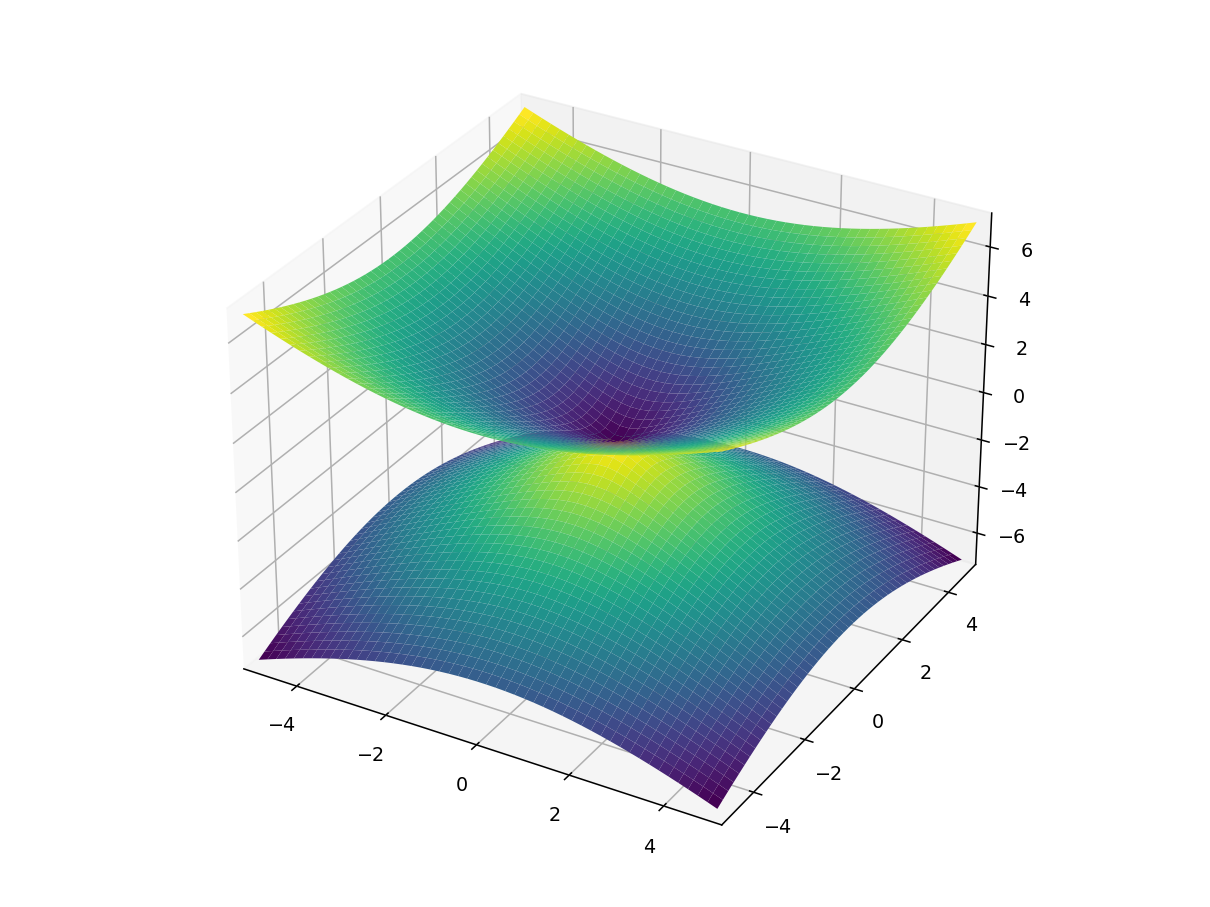

In [23]:
%matplotlib notebook
x,y = symbols("x, y")
plot3d(sqrt(x**2+y**2),-sqrt(x**2+y**2), (x,-5,5),(y,-5,5))

### Plot of implicit expressions

What if our curve or surface is given with an implicit formula?
Sympy can handle it.

#### 2D plots

Now we draw an circumference:
$$x^2 + y^2 = 16$$

<IPython.core.display.Javascript object>


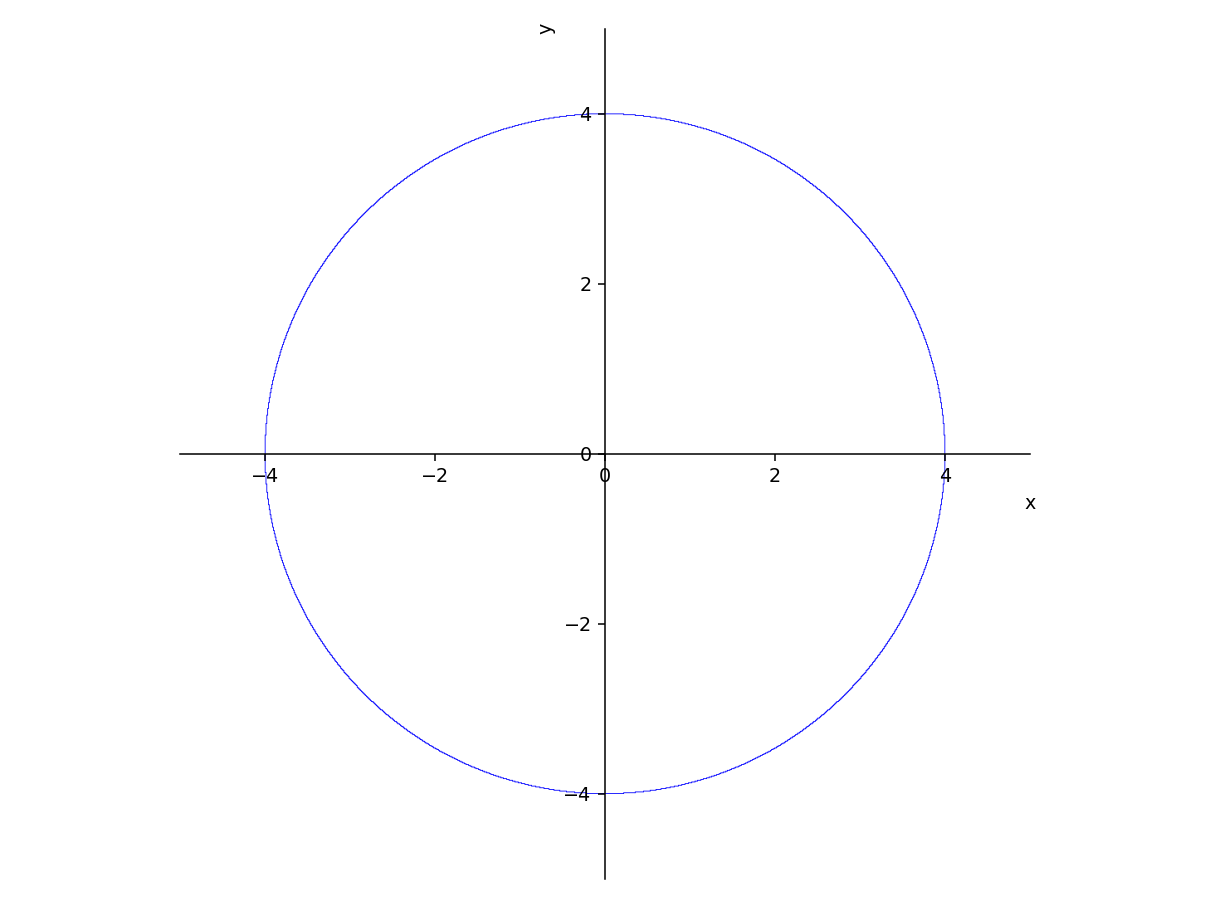

In [24]:
plot_implicit(Eq(x**2+y**2,16),(x,-5,5),(y,-5,5), aspect_ratio=(1,1))

Here an hyperbola:
$$x^2 - y^2 = 1$$

with asymptotes:
$$y = \pm x$$

<IPython.core.display.Javascript object>


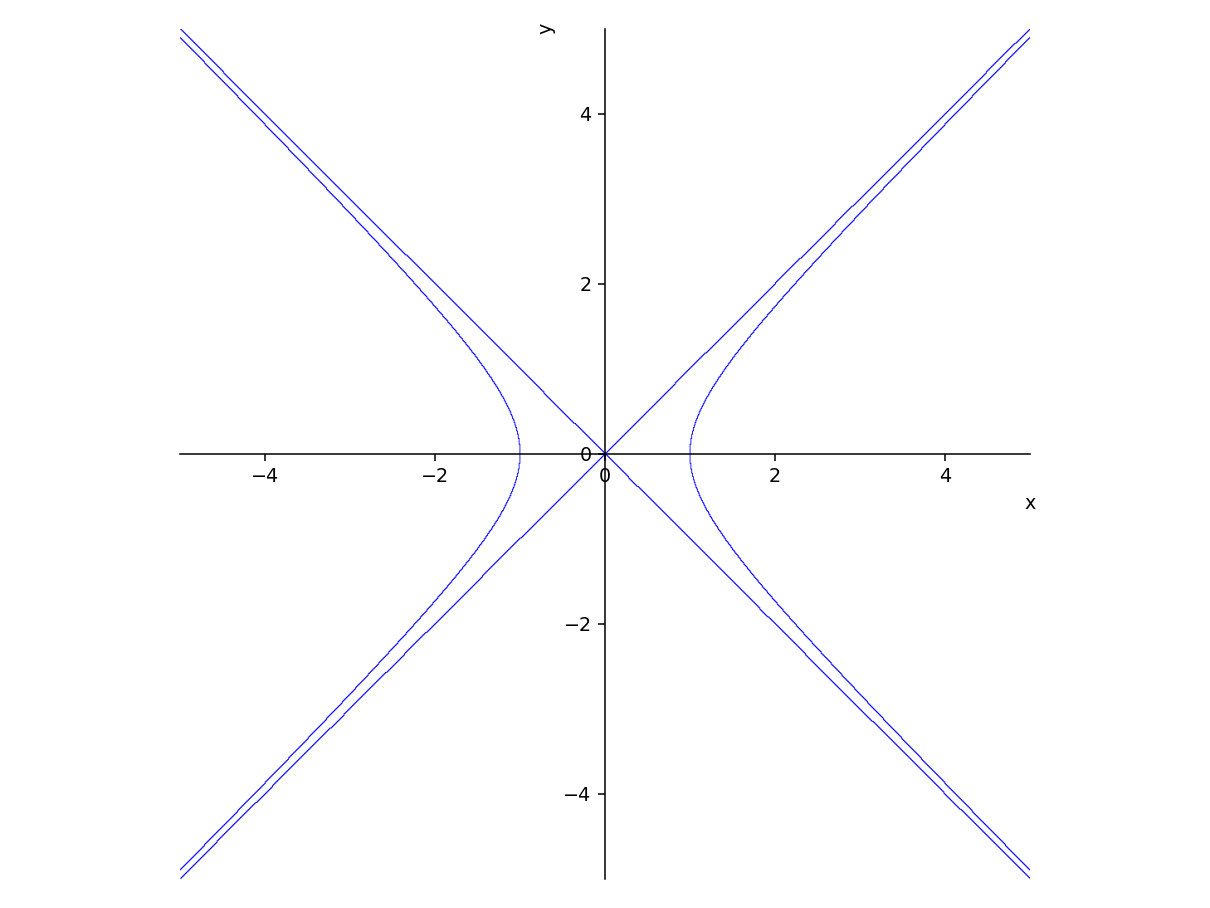

In [25]:
hyp = (x**2-y**2-1)
as1 = (y-x)
as2 = (y+x)

plot_implicit(Eq(hyp*as1*as2,0), (x,-5,5),(y,-5,5), aspect_ratio=(1,1))

### 3D plots

The implementation of implicit generic 3D plots is not always straightforward: it's not always possible to find an analytic expression for the folds $z(x,y)$. For instance, as we saw before:
$$x^2 + y^2 - z^2 = 0$$
can be plotted doing the usual plot for the 2 functions:

$$z(x,y)= +\sqrt{x^2+y^2} $$
$$z(x,y)= -\sqrt{x^2+y^2} $$

But how should we plot the following curve?

$$x^2 \, tan(yz) + log(x+z) \, \sqrt{y} + sin(z) = \frac{x}{z}$$

The trick here is to define function which can plot a class of 3D curves, such as the quadrics.


In [26]:
print("Here we define a quadric plotter.")
def plot3d_quadric(eq,x,a,b,y,c,d,z):
    sol = solve(eq,z) # solving for 'z'
    print("Plotting the following curves:")
    for s in sol: 
        display(Eq(z,s)) # displaying the solution
    plot3d(sol[0],sol[1],(x,a,b),(y,c,d)) # plotting the solution 

Here we define a quadric plotter.


Plotting the following curves:


Eq(z, -sqrt(-x**2 - y**2 + 16))

Eq(z, sqrt(-x**2 - y**2 + 16))

<IPython.core.display.Javascript object>


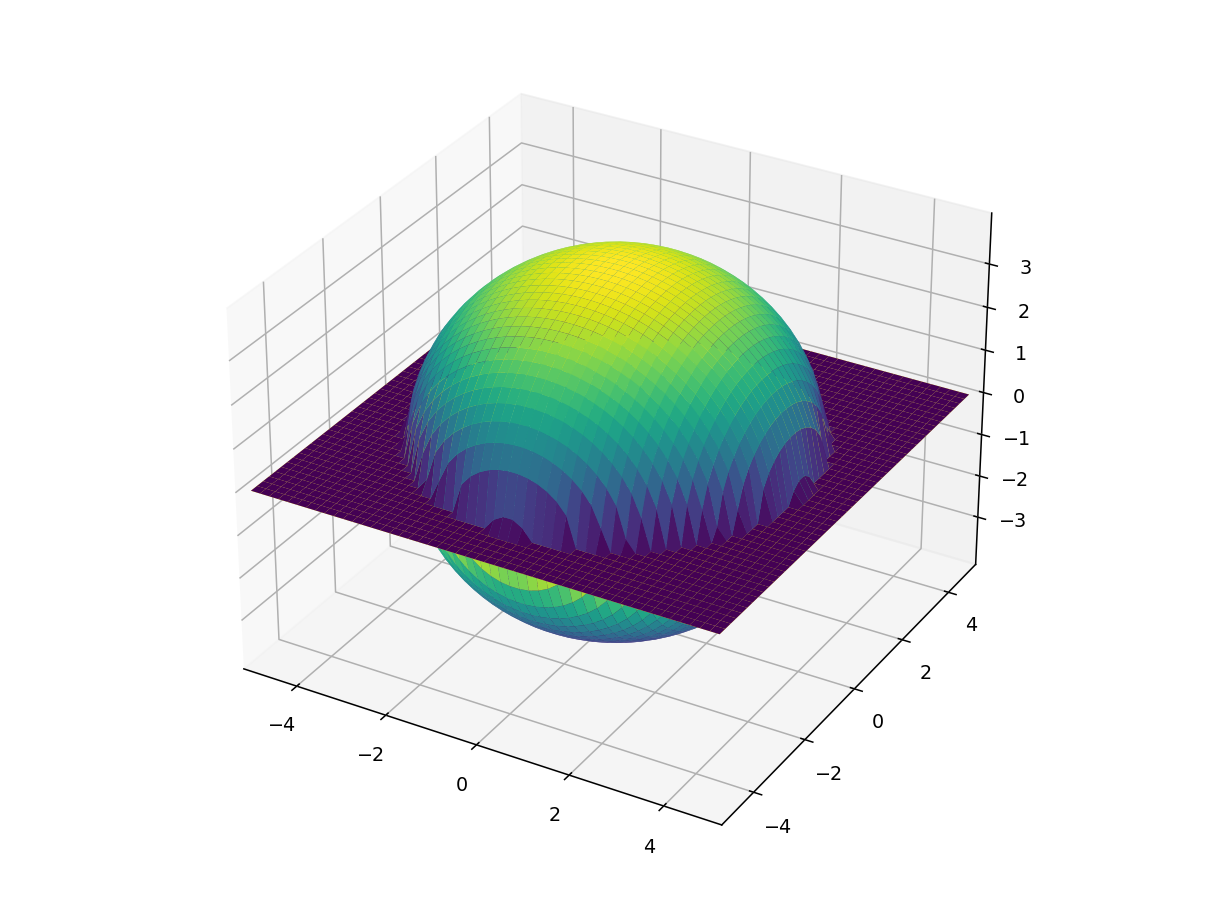

In [27]:
plot3d_quadric(x**2+y**2+z**2-16,x=x,a=-5,b=5,y=y,c=-5,d=5,z=z)

Eq(-x**2 - y**2 + z**2, 0)

Plotting the following curves:


Eq(z, -sqrt(x**2 + y**2))

Eq(z, sqrt(x**2 + y**2))

<IPython.core.display.Javascript object>


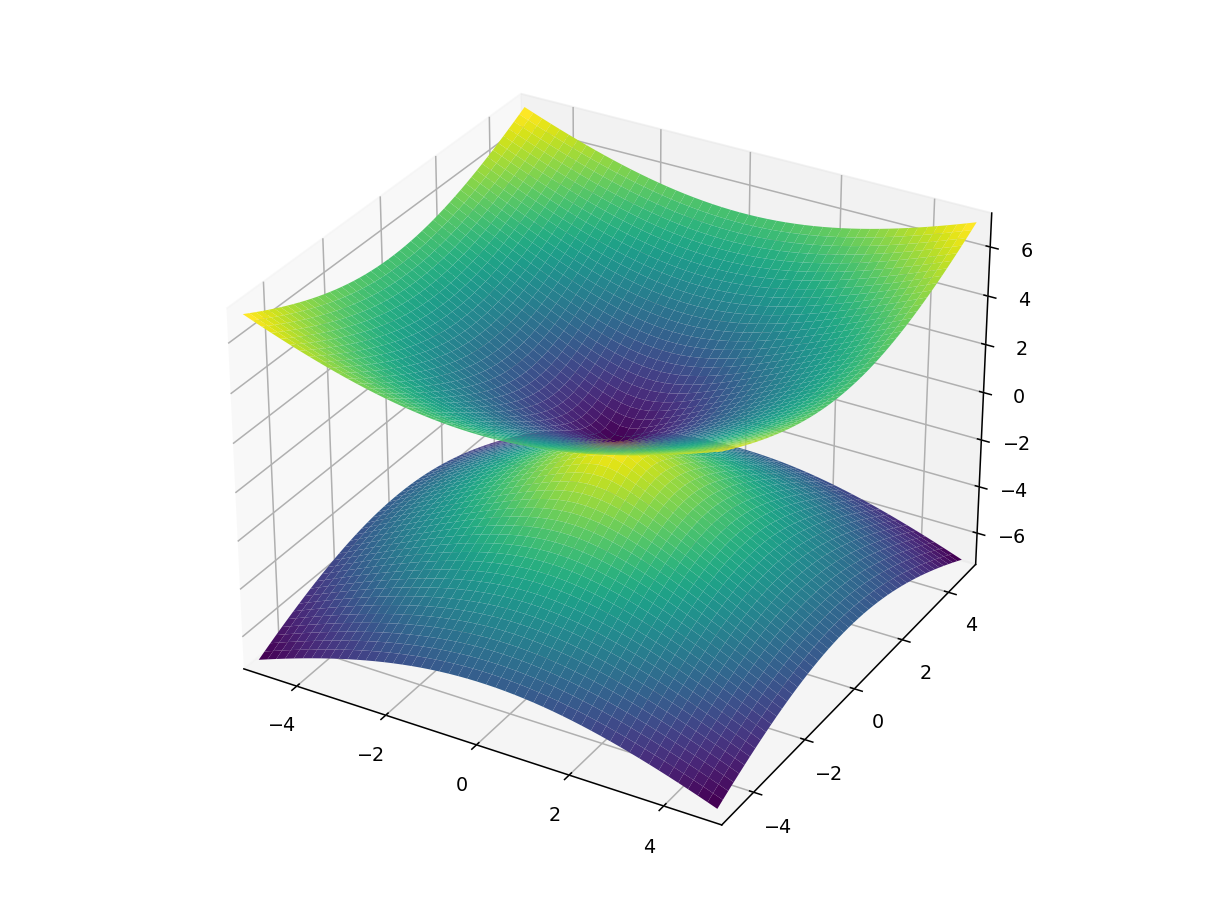

In [28]:
Q1 = z**2-x**2-y**2
display(Eq(Q1, 0))
plot3d_quadric(z**2-x**2-y**2,x,-5,5,y,-5,5,z)

Eq(x**2 + y**2 - z**2 - 1, 0)

Hyperboloid from the 2 z(x,y) curves:
Plotting the following curves:


Eq(z, -sqrt(x**2 + y**2 - 1))

Eq(z, sqrt(x**2 + y**2 - 1))

<IPython.core.display.Javascript object>


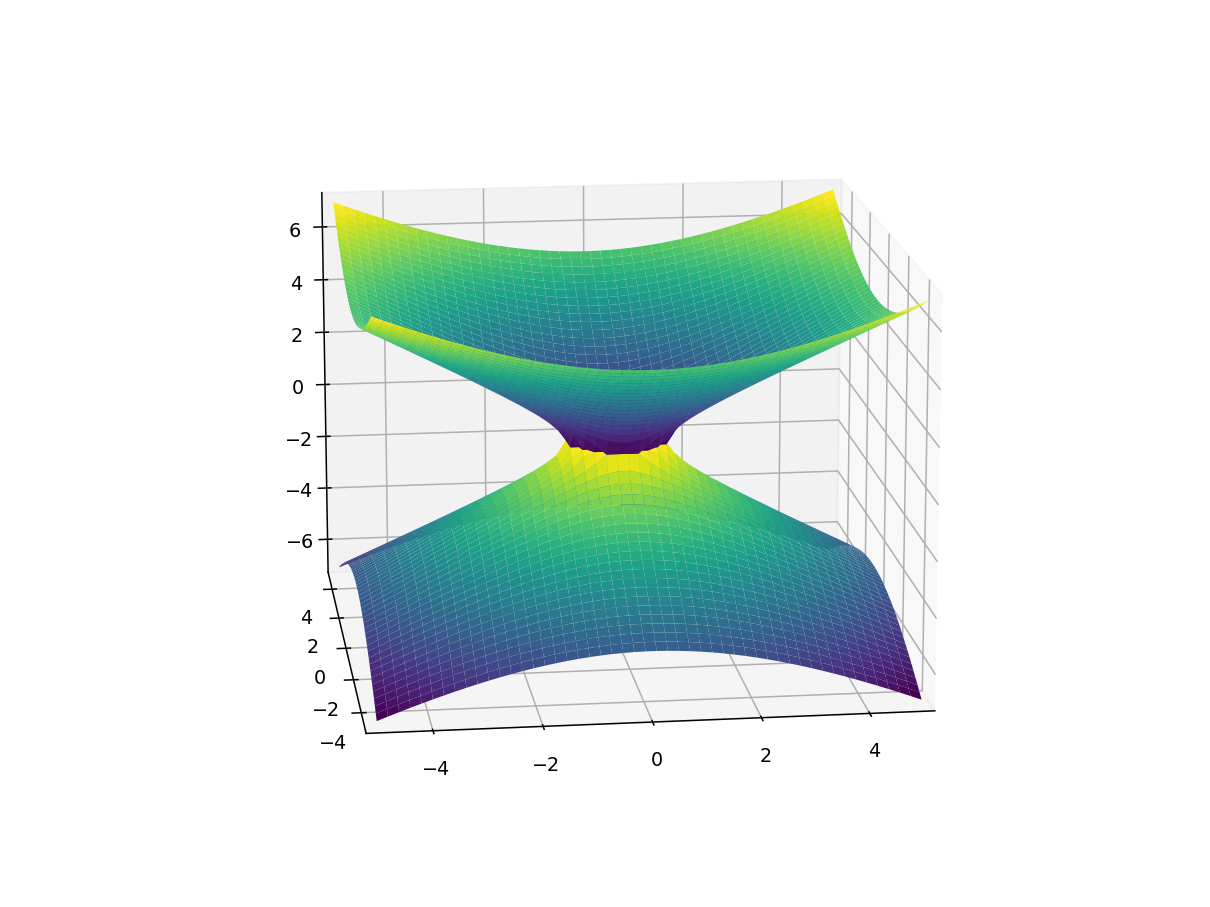

In [29]:
Q2 = x**2+y**2-z**2-1
display(Eq(Q2, 0))
print("Hyperboloid from the 2 z(x,y) curves:")
plot3d_quadric(Q2,x,-5,5,y,-5,5,z)

### Parametric plots

We can draw curves using the parametric representation:
$$\vec{r}(t) = \vec{f}(t)$$

Consider the simple case of a circumference of radius $R=1$. The parametrization is:

$$x(t) = \cos{(t)} $$
$$y(t) = \sin{(t)}$$

for $t \in [0,2\pi)$

<IPython.core.display.Javascript object>


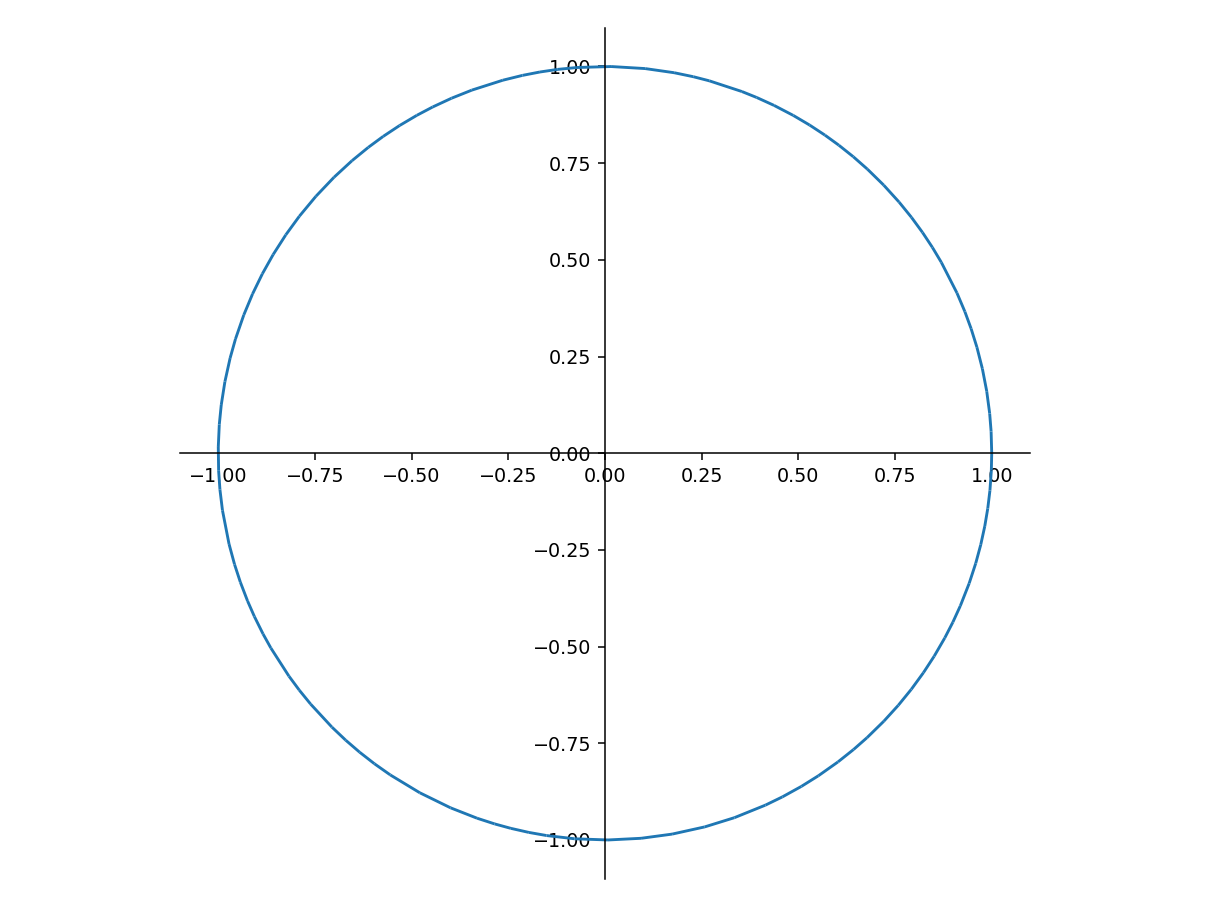

In [30]:
plot_parametric(cos(t),sin(t),(t,0,2*pi),aspect_ratio=(1,1))

Now let's dive in to some more complicated example: a [cardioid](https://en.wikipedia.org/wiki/Cardioid) with radius $a=1$.
This is the movement of a point of a circumference rounding up to another.

$$x(t) = (1 - \cos{(t)})\,\cos{(t)}$$
$$y(t) = (1 - \cos{(t)})\,\sin{(t)}$$


<IPython.core.display.Javascript object>


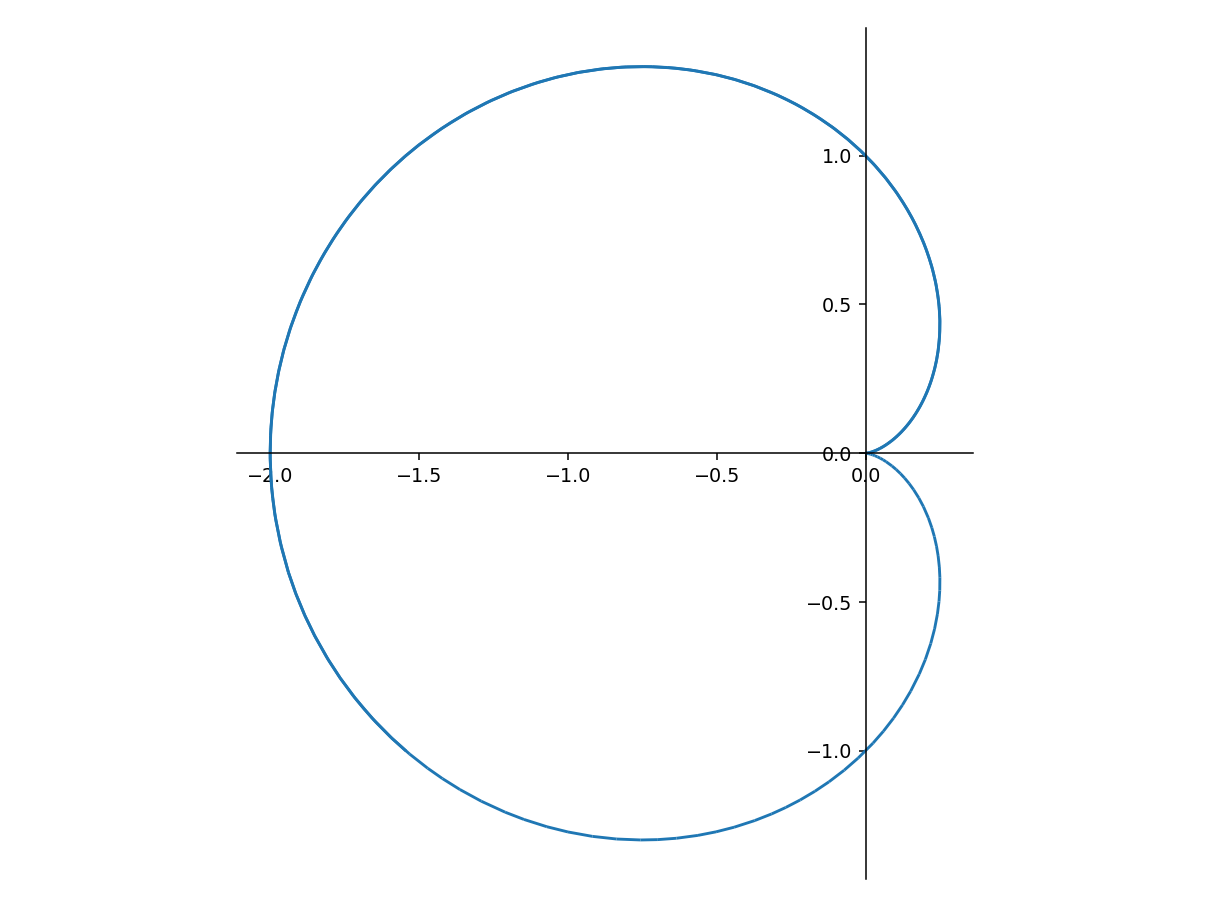

In [31]:
x_card = (1 - cos(t))*cos(t)
y_card = (1 - cos(t))*sin(t)
plot_parametric(x_card, y_card, (t,0,10), aspect_ratio=(1,1))

Now a cycloid:

$$x(t) = r(t - \sin{(t)})$$
$$y(t) = r(1 - \cos{(t)})$$

we choose $r=1$

<IPython.core.display.Javascript object>


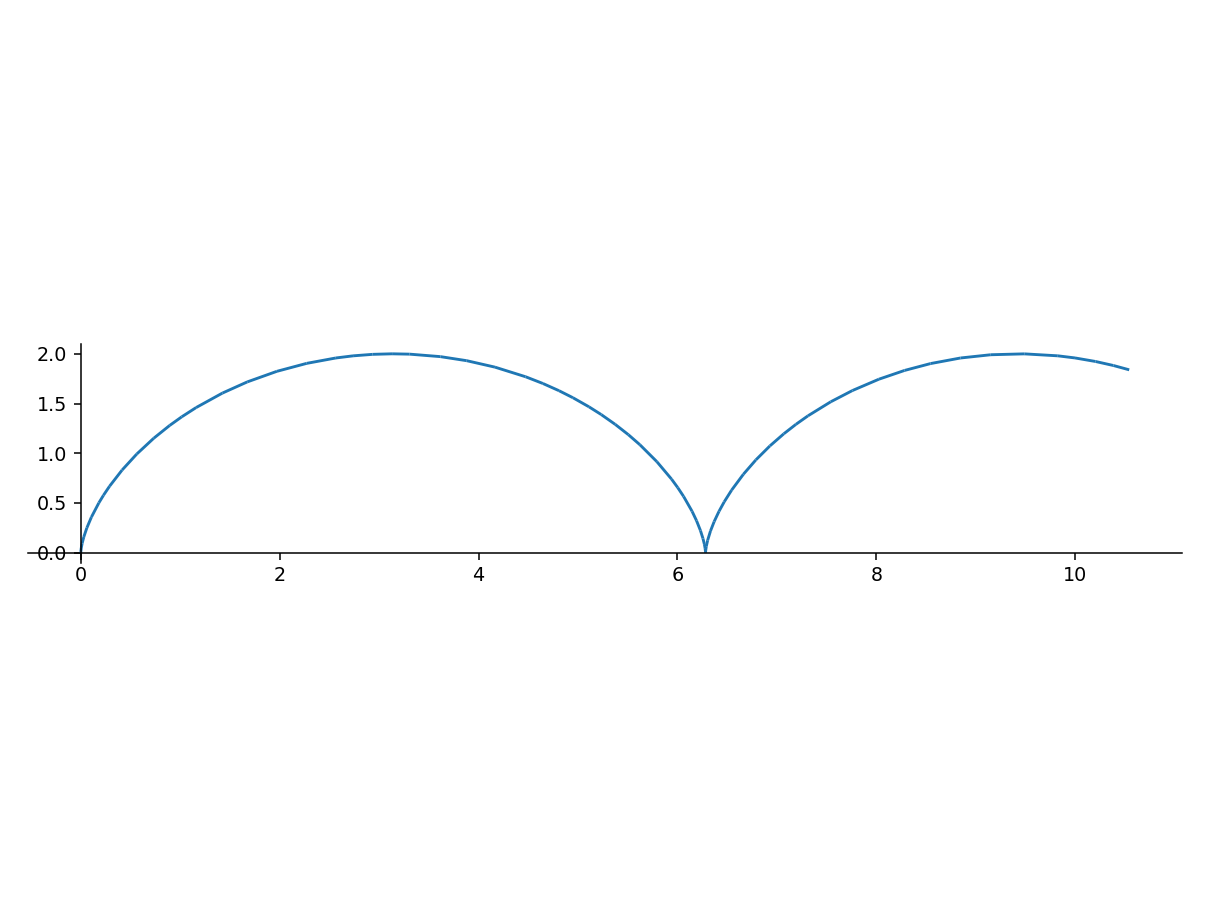

In [32]:
x_cycl = (t - sin(t))
y_cycl = (1 - cos(t))
plot_parametric(x_cycl, y_cycl, (t,0,10), aspect_ratio=(1,1))

Now we draw a spiral:
$$r(\theta) = A \theta$$

(we'll choose $A=1$)

How do we parametrize in terms of $x,y$ ?

$$x(t) = r(\theta) \cos{(\theta)} = A \theta \cos{(\theta)}$$
$$y(t) = r(\theta) \sin{(\theta)} = A \theta \sin{(\theta)}$$

<IPython.core.display.Javascript object>


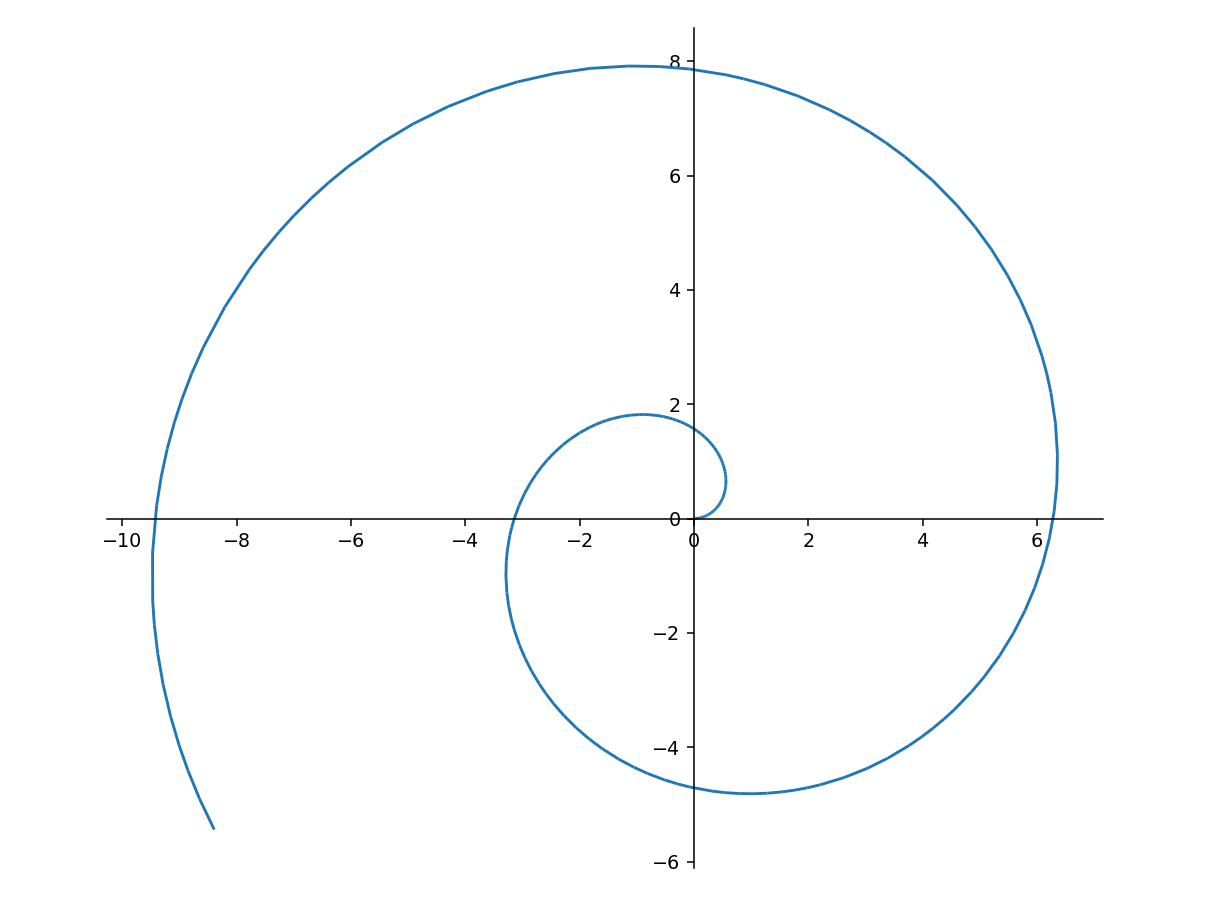

In [33]:
theta = symbols("theta")
x_spir = theta*cos(theta)
y_spir = theta*sin(theta)
plot_parametric(x_spir, y_spir, (theta,0, 10), aspect_ratio=(1,1))

## 3D plotting

We can plot in 3D. Let's start with a line:

$$x(t) =   -2t $$
$$y(t) = 3 + t $$
$$z(t) = 1 + t $$

<IPython.core.display.Javascript object>


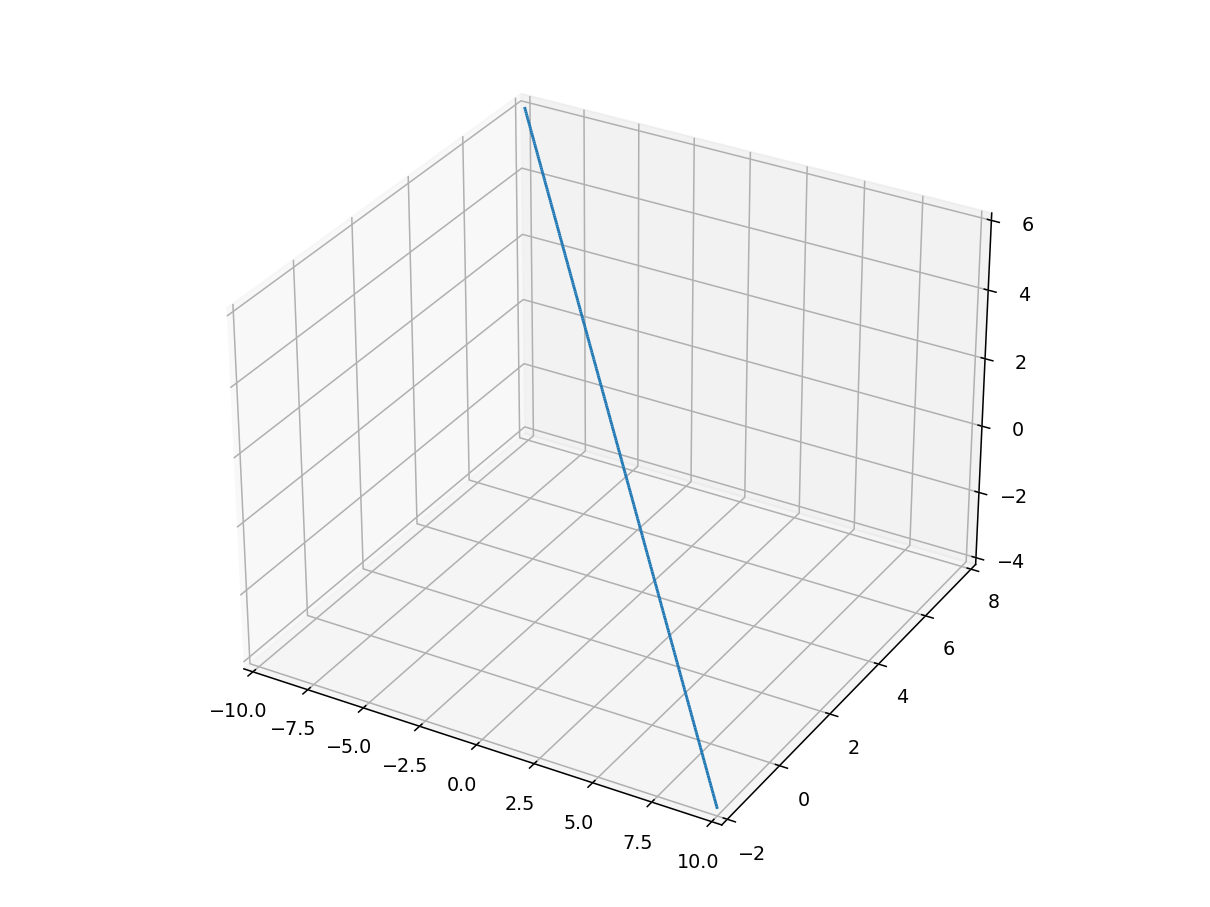

In [34]:
plot3d_parametric_line(-2*t, 3+t, 1+t, (t, -5, 5)) 

And last, but not least, an **helix**.
This is the motion of an electric charge with a magnetic field along the $z$ axis:
$$ x(t) = \cos{(t)} $$ 
$$ y(t) = \sin{(t)} $$ 
$$ z(t) = t $$ 


<IPython.core.display.Javascript object>


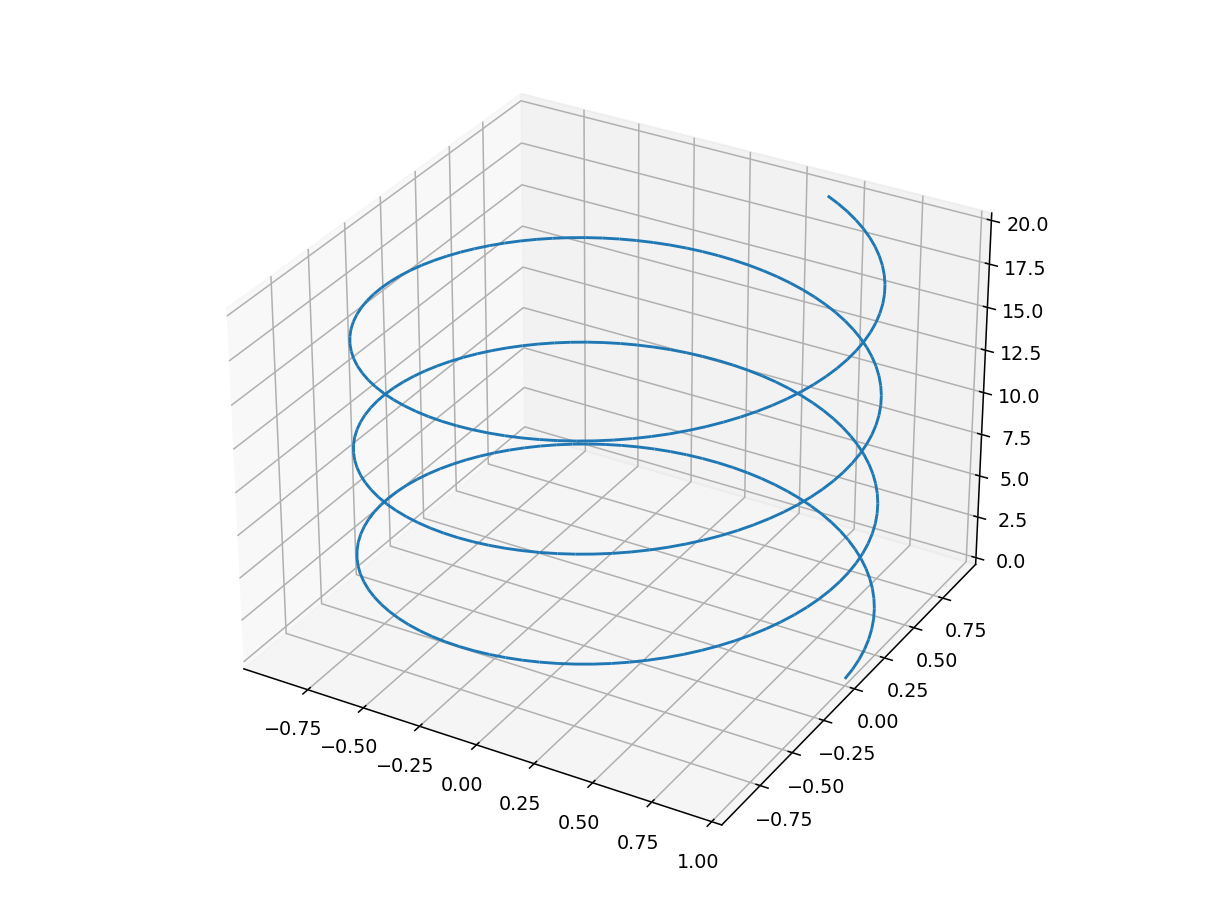

In [35]:
x_hel = cos(t)
y_hel = sin(t)
z_hel = t

plot3d_parametric_line(x_hel, y_hel, z_hel, (t, 0, 20))

### Hyperboloid as a ruled surface

Here we show how an hyperboloid can be drawn. We can use parametric plot utilities from sympy.plotting, or draw it from the straight lines that generate it.

$$x(t,s) = a \sqrt{1 + t^2} \cos{(s)}$$
$$y(t,s) = b \sqrt{1 + t^2} \sin{(s)}$$
$$z(t,s) = c t $$

Hyperboloid drawn as a parametric curve:


<IPython.core.display.Javascript object>


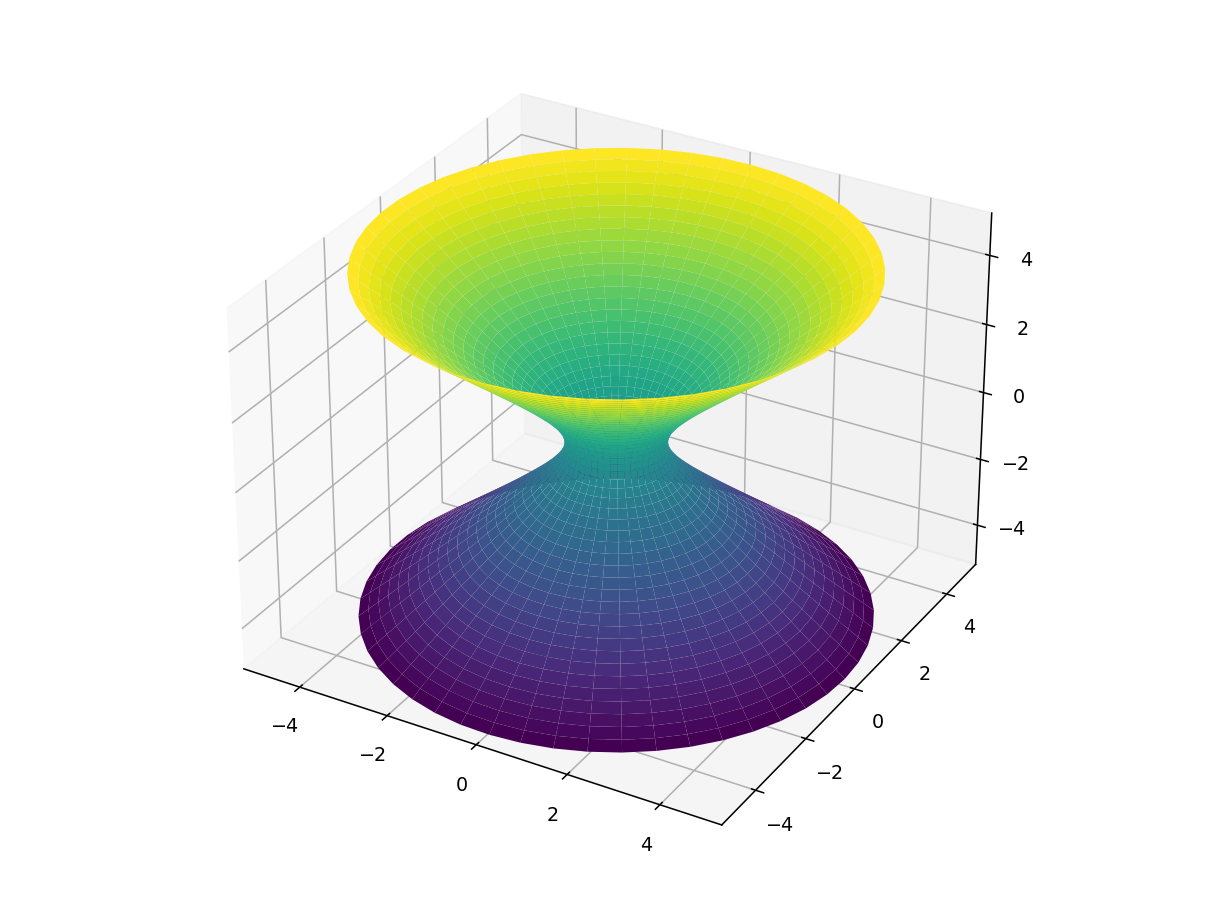

In [36]:
t,s = symbols('t, s')
a=b=c=1
from numpy import pi as pi
n=20
print("Hyperboloid drawn as a parametric curve:")
x_hyp = a*sqrt(1+t**2)*cos(s)
y_hyp = b*sqrt(1+t**2)*sin(s)
z_hyp = c*t
plot3d_parametric_surface(x_hyp,y_hyp, z_hyp, (t, -5, 5), (s,0,2*pi))

In order to draw the hyperboloid as a ruled surface, keep in mind the following image:

![HypRuled](./HyperboloidRuled.png)

Our steps are then:

* generate $n$ points along 2 circumferences, with some phase difference between the corresponding points
* draw a straight line connecting the couples of points of the circumference


In [37]:
print("We define here a function which draws a circumference on the xy plane at height z")
import numpy as np
def circ_points(n, phi, h):
    points = [] # list of points
    for i in range(0,n):
        theta = phi + i*(2*np.pi/n) 
        x = cos(theta)
        y = sin(theta)
        z = h
        points.append([x,y,z])
    return points
   
print("Check of the function:")
Pi = circ_points(10, 0.0, 0.0)
print(Pi)

We define here a function which draws a circumference on the xy plane at height z
Check of the function:
[[1, 0, 0.0], [0.809016994374947, 0.587785252292473, 0.0], [0.309016994374947, 0.951056516295154, 0.0], [-0.309016994374947, 0.951056516295154, 0.0], [-0.809016994374947, 0.587785252292473, 0.0], [-1.00000000000000, 1.22464679914735e-16, 0.0], [-0.809016994374948, -0.587785252292473, 0.0], [-0.309016994374948, -0.951056516295154, 0.0], [0.309016994374947, -0.951056516295154, 0.0], [0.809016994374947, -0.587785252292473, 0.0]]


In [38]:
print("Here we define a function that plot a line passing for A and B")
import numpy as np
def get_plot_line(A0,B0, I=[-5,5]):
    A = np.array(A0)
    B = np.array(B0)
    v = (A - B)
    t = symbols("t")
    rt = A + v*t
    return plot3d_parametric_line(rt[0], rt[1], rt[2], (t, I[0], I[1]), show=False)

  
print("testing")
p1 = get_plot_line([0,0,0],[1,2,3])
# p1.show()


Here we define a function that plot a line passing for A and B
testing


<IPython.core.display.Javascript object>


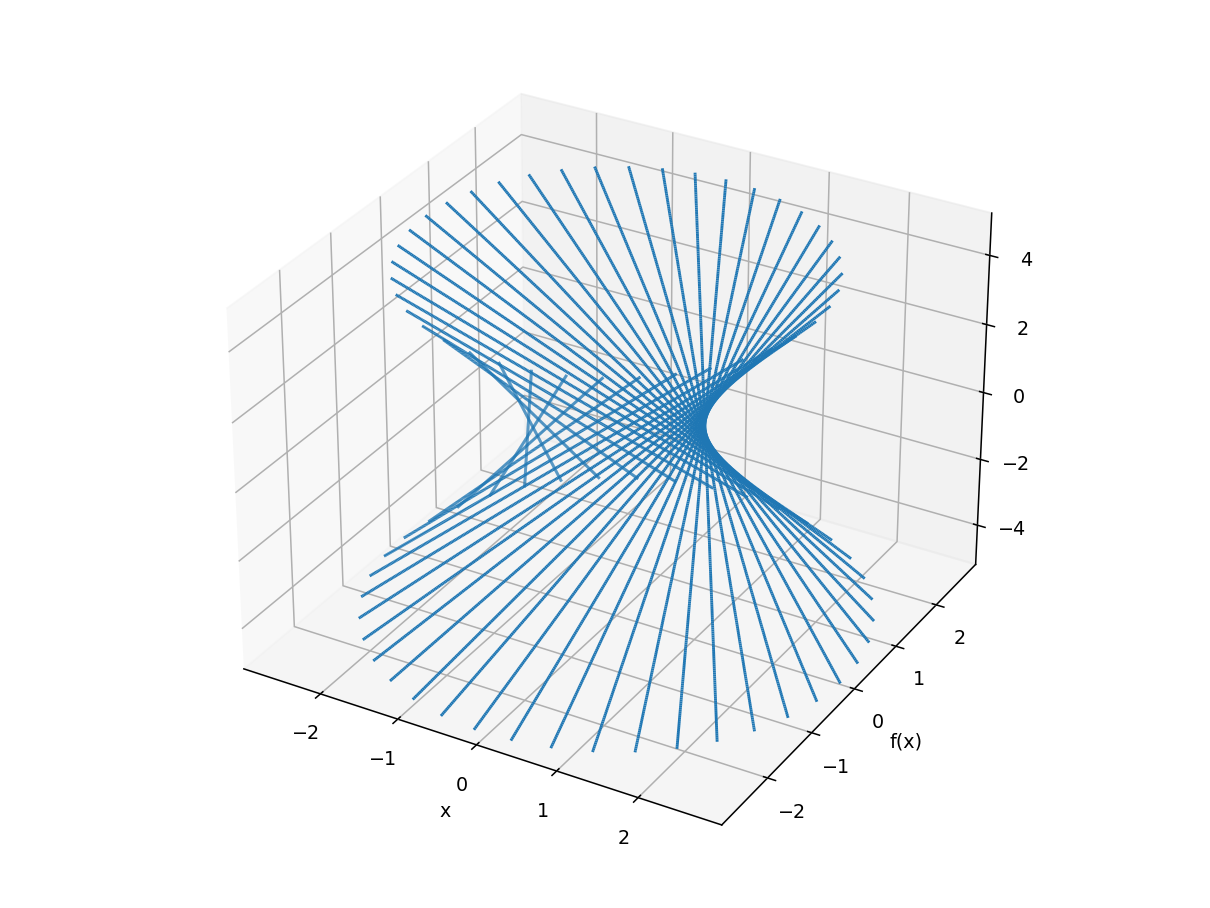

In [39]:
N = 40
phi = 0.5
h = 1
c1 = circ_points(N,0.0,0.0)
c2 = circ_points(N,phi,h)

P_hyp = sympy.plotting.plot(show=False)
for i in range(0,N):
    P_hyp.extend(get_plot_line(c1[i], c2[i]))
P_hyp.show()


Now we can think to automate the process:


In [40]:
print("Defining a function for generic hyperboloid as ruled surface")
def hyp_ruled(N, phi, h):
    c1 = circ_points(N,0.0,0.0)
    c2 = circ_points(N,phi,h)
    P_hyp = sympy.plotting.plot(show=False)
    for i in range(0,N):
        P_hyp.extend(get_plot_line(c1[i], c2[i]))
    P_hyp.show()
    

Defining a function for generic hyperboloid as ruled surface


Testing:


<IPython.core.display.Javascript object>


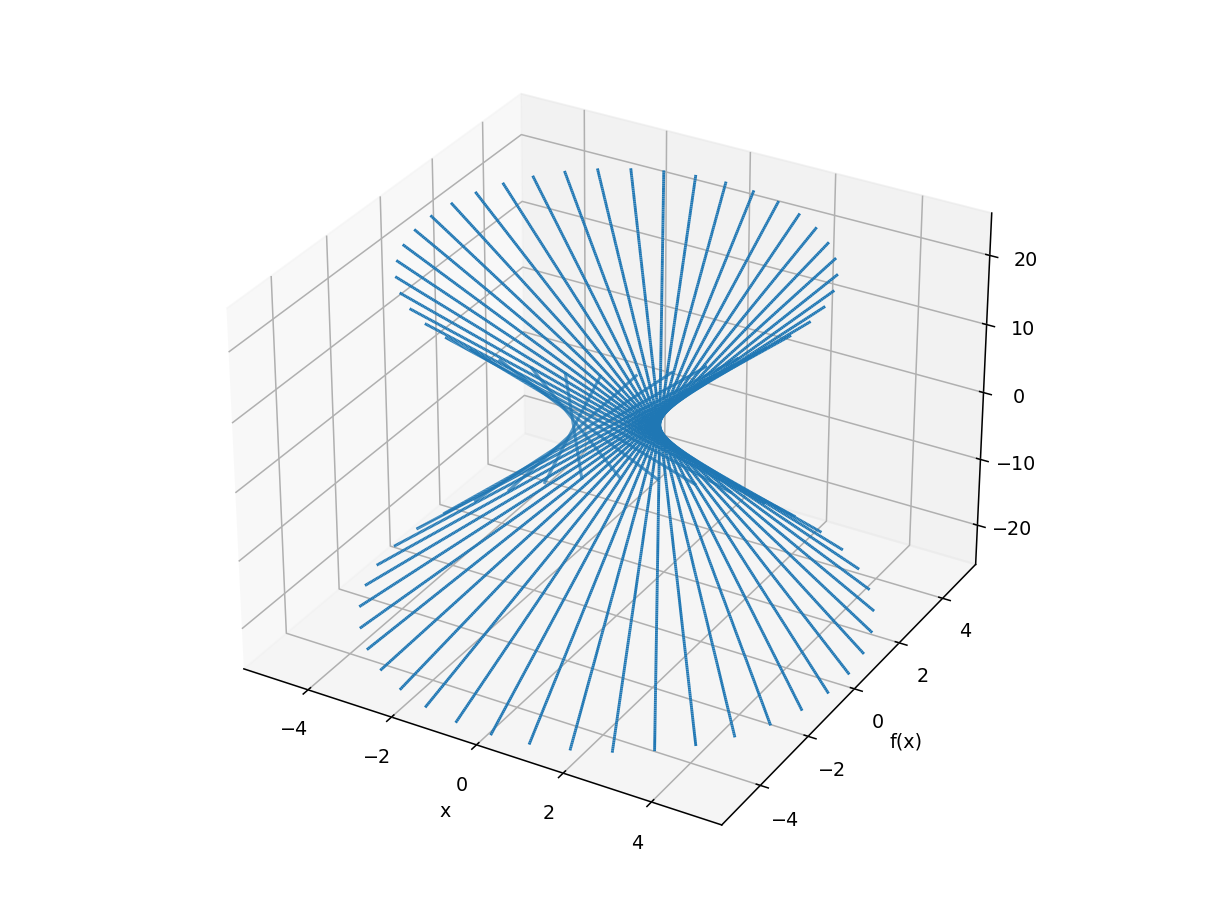

In [41]:
print("Testing:")

hyp_ruled(40, 1.0, 5)